In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from classy import Class
import scipy
import scipy.interpolate

#from nbodykit.lab import *
#from nbodykit import style, setup_logging

import matplotlib
import matplotlib.pyplot as plt
#plt.style.use(style.notebook)

from scipy.interpolate import interp1d, interp2d
import math
import scipy.special as sp

import os
from time import time

In [2]:
np.linspace(-3, -0.5, 2)

array([-3. , -0.5])

In [3]:
Om_ref = 0.32
Ob_ref = 0.049
wDE_ref = -1.0
h_ref = 0.67
ns_ref = 0.96
As_ref = 2.1e-09
#Onu_ref = 0.058/(93.15*h_ref**2)
z_max_pk = 200       # highest redshift involved

k_per_decade = 35#180     # number of k values, controls final resolution
P_k_max_h_Mpc = 10.0   # this value is directly the maximum k value in the figure in Mpc

cs2log10a_vals_list = ','.join(map(str, np.linspace(-14, 0, 11))) 
cs2vals_list = ','.join(map(str, 0.9*np.ones(11))) 

cosmo_ref = Class()
cosmo_ref.set(
        {'output':'mPk, dTk, vTk',
          'Omega_Lambda': 0,
          'w0_fld':'-1.',
          'wa_fld': '0.',
          'A_s':As_ref,
          'n_s':ns_ref,
          'cs2log10a_vals': cs2log10a_vals_list,
          'cs2_z_alpha': 0.,
          #'cs2_vals': "0.5, 0.4, 0.4, 0.9, 0.2",
          'cs2_vals': cs2vals_list,
          'cs2_interpolation_order': 1,
          #'cs2_spline_regulator': 'tanh',
          'z_max_pk':z_max_pk,
          'P_k_max_h/Mpc' : P_k_max_h_Mpc,
          'z_pk':'0.0, 1.0, 2.0',
          #'background_verbose': 3,
          #'perturbations_verbose':7,
          'evolver': 0,
          'h': h_ref,
          'Omega_b':Ob_ref,
          'Omega_cdm': Om_ref - Ob_ref})#,0.003587746997724588,#0.0013878391714135642,
cosmo_ref.compute()



cosmo_ref2 = Class()
cosmo_ref2.set(
        {'output':'mPk, dTk, vTk',
          'Omega_Lambda': 0,
          'w0_fld':'-0.9',
          'wa_fld': '0.1',
          'cs2_fld': '0.9',
          'A_s':As_ref,
          'n_s':ns_ref,
          #'cs2log10a_vals': cs2log10a_vals_list,
          #'cs2_z_alpha': 0.,
          #'cs2_vals': "0.5, 0.4, 0.4, 0.9, 0.2",
          #'cs2_vals': cs2vals_list,
          #'cs2_interpolation_order': 1,
          #'cs2_spline_regulator': 'tanh',
          'z_max_pk':z_max_pk,
          'P_k_max_h/Mpc' : P_k_max_h_Mpc,
          'z_pk':'0.0, 1.0, 2.0',
          #'background_verbose': 3,
          #'perturbations_verbose':3,
          'evolver': 0,
          'h': h_ref,
          'Omega_b':Ob_ref,
          'Omega_cdm': Om_ref - Ob_ref})#,0.003587746997724588,#0.0013878391714135642,
cosmo_ref2.compute()

In [8]:
chi = cosmo_ref.get_background()['comov. dist.']
z = cosmo_ref.get_background()['z']

In [12]:
z_of_chi = interp1d(chi, z)

In [13]:
z_of_chi(1000.)

array(0.2374266)

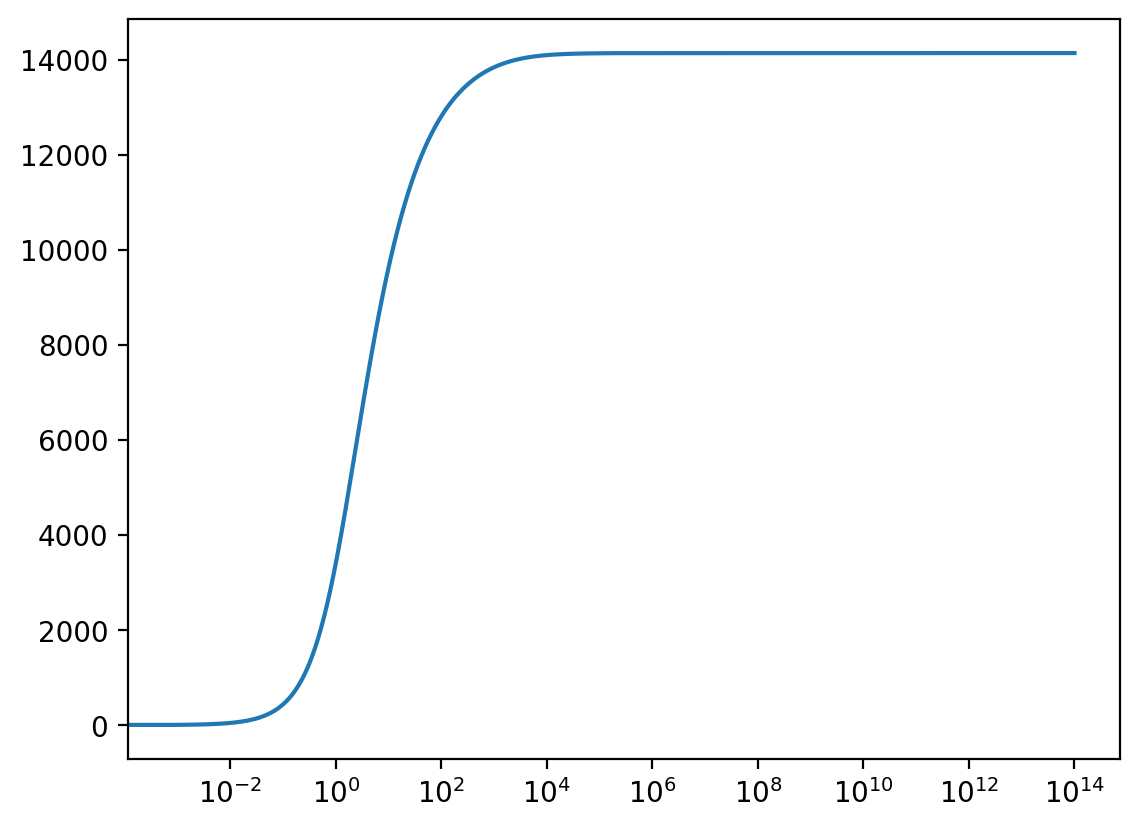

In [11]:
plt.semilogx(z, chi)


In [11]:
cs2log10a_vals_list = ','.join(map(str, np.linspace(-14, 0, 11))) 
cs2vals_list = ','.join(map(str, np.random.rand(1,11)[0])) 

cosmo_cs2 = Class()
cosmo_cs2.set(
        {'output':'mPk, dTk, vTk',
          'Omega_Lambda': 0,
          'w0_fld':'-1.12,',
          'wa_fld': '-0.1',
          'A_s':As_ref,
          'n_s':ns_ref,
          #'cs2log10a_vals': cs2log10a_vals_list,
          'cs2log10a_vals': cs2log10a_vals_list,
          'cs2_z_alpha': 0.,
          'cs2_vals': cs2vals_list,#'0.03221690718807866, 0.03337670964185755, 0.0300928998027658, 0.03125606449951051, 0.031045287440665082, 0.03118977564039635',
          #'cs2_vals': cs2vals_list,
          'cs2_interpolation_order': 1,
          #'cs2_spline_regulator': 'tanh',
          'z_max_pk':z_max_pk,
          'P_k_max_h/Mpc' : P_k_max_h_Mpc,
          'z_pk':'0.0, 1.0, 2.0',
          'evolver': 0,
          'recons_wfld': 0.,
          'h': h_ref,
          'Omega_b':Ob_ref,
          'Omega_cdm': Om_ref - Ob_ref})#,0.003587746997724588,#0.0013878391714135642,
cosmo_cs2.compute()

cs2log10a_vals_list = ','.join(map(str, np.linspace(-14, 0, 11))) 
cs2vals_list = ','.join(map(str, 0.1*np.resize([1,-1], 11))) 

cosmo_cs2_w = Class()
cosmo_cs2_w.set(
        {'output':'mPk, dTk, vTk',
          'Omega_Lambda': 0,
          'w0_fld':'-1.12',
          'wa_fld': '-0.1',
          'A_s':As_ref,
          'n_s':ns_ref,
          'cs2log10a_vals': cs2log10a_vals_list,
          'cs2_z_alpha': 0.,
          'cs2_vals': cs2vals_list,
          'cs2_interpolation_order': 1,
          'recons_wfld': 1.,
          #'cs2_spline_regulator': 'tanh',
          'z_max_pk':z_max_pk,
          'P_k_max_h/Mpc' : P_k_max_h_Mpc,
          'z_pk':'0.0, 1.0, 2.0',
          'evolver': 0,
          'h': h_ref,
          'Omega_b':Ob_ref,
          'Omega_cdm': Om_ref - Ob_ref})#,0.003587746997724588,#0.0013878391714135642,
cosmo_cs2_w.compute()


In [12]:
z = cosmo_ref.get_background()['z']
a = 1./(1.+z)

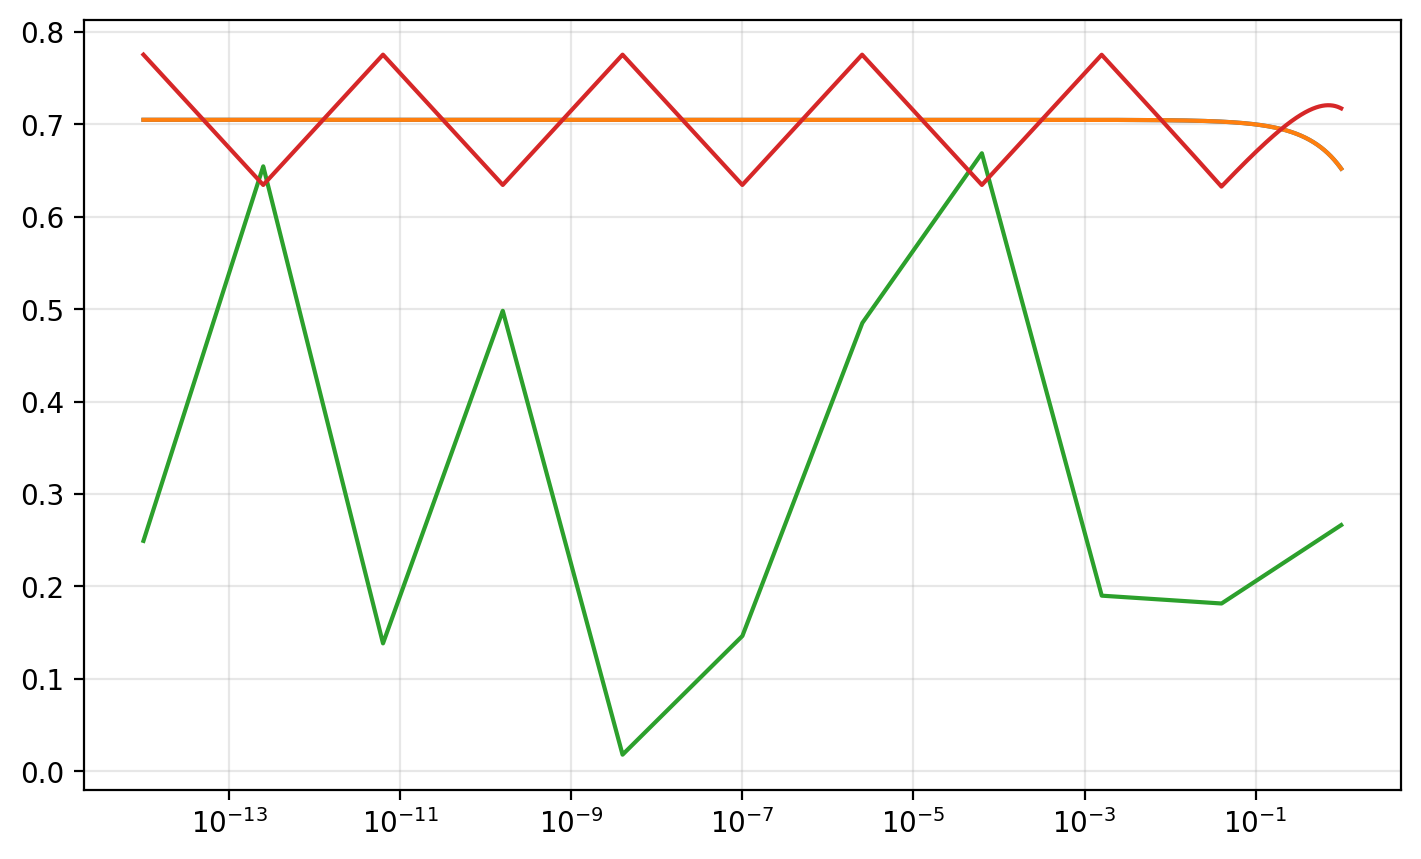

In [13]:
plt.figure(figsize=(8.5, 5))

plt.semilogx(a, np.tanh(cosmo_cs2.get_background()['(.)w_fld'])**2.)
plt.semilogx(a, np.tanh(cosmo_cs2_w.get_background()['(.)w_fld'])**2.)

plt.semilogx(a, cosmo_cs2.get_background()['cs2_fld'])
plt.semilogx(a, cosmo_cs2_w.get_background()['cs2_fld'])

plt.grid(alpha=0.3)

In [97]:
cosmo_ref.get_transfer(0.).keys()

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_fld', 'd_p_fld', 'd_rho_fld', 'd_ur', 'd_m', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_fld', 't_ur', 't_tot'])

In [98]:
cosmo_ref.get_background().keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_fld', '(.)w_fld', 'cs2_fld', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f', 'dcs2_dlna', 'int_cs2_dlna'])

In [99]:
k_tks = cosmo_ref.get_transfer(0.)['k (h/Mpc)'] * cosmo_ref.h()
d_fld = cosmo_ref.get_transfer(0.)['d_fld']
t_fld = cosmo_ref.get_transfer(0.)['t_fld']
t_tot = cosmo_ref.get_transfer(0.)['t_tot']
d_rho_fld = cosmo_ref.get_transfer(0.)['d_rho_fld']
d_p_fld = cosmo_ref.get_transfer(0.)['d_p_fld']

k_tks2 = cosmo_ref2.get_transfer(0.)['k (h/Mpc)'] * cosmo_ref.h()
d_fld2 = cosmo_ref2.get_transfer(0.)['d_fld']
t_fld2 = cosmo_ref2.get_transfer(0.)['t_fld']
t_tot2 = cosmo_ref2.get_transfer(0.)['t_tot']
d_rho_fld2 = cosmo_ref2.get_transfer(0.)['d_rho_fld']
d_p_fld2 = cosmo_ref2.get_transfer(0.)['d_p_fld']

H_inv_Mpc = cosmo_ref.get_background()['H [1/Mpc]']
rho_tot = cosmo_ref.get_background()['(.)rho_tot']
p_tot = cosmo_ref.get_background()['(.)p_tot']

rho_fld = cosmo_ref.get_background()['(.)rho_fld']
w_fld = cosmo_ref.get_background()['(.)w_fld']
p_fld = w_fld * rho_fld
tau = cosmo_ref.get_background()['conf. time [Mpc]']
w_p_fld = np.gradient(w_fld, tau)
ca2_fld = w_fld - (1./3./a/H_inv_Mpc) * w_p_fld/(1. + w_fld)
cs2_fld = cosmo_ref.get_background()['cs2_fld']

d_p_recons_z0 = rho_fld[-1] * ( cs2_fld[-1] * d_fld  + 3. * a[-1] * H_inv_Mpc[-1] * (1. + w_fld[-1]) * (cs2_fld[-1] - ca2_fld[-1])*t_tot/k_tks/k_tks )
d_p_recons2_z0 = rho_fld[-1] * ( cs2_fld[-1] * d_fld2  + 3. * a[-1] * H_inv_Mpc[-1] * (1. + w_fld[-1]) * (cs2_fld[-1] - ca2_fld[-1])*t_tot2/k_tks/k_tks )

d_p_CLASS_recons_z0 = ( cs2_fld[-1] * rho_fld[-1] * d_fld  + 3. * a[-1] * H_inv_Mpc[-1] * (rho_tot[-1] + p_tot[-1]) * (cs2_fld[-1] - ca2_fld[-1])*t_tot/k_tks/k_tks )
d_p_CLASS_recons2_z0 = ( cs2_fld[-1] * rho_fld[-1] * d_fld2  + 3. * a[-1] * H_inv_Mpc[-1] * (rho_tot[-1] + p_tot[-1]) * (cs2_fld[-1] - ca2_fld[-1])*t_tot2/k_tks/k_tks )

(-2.0, 2.0)

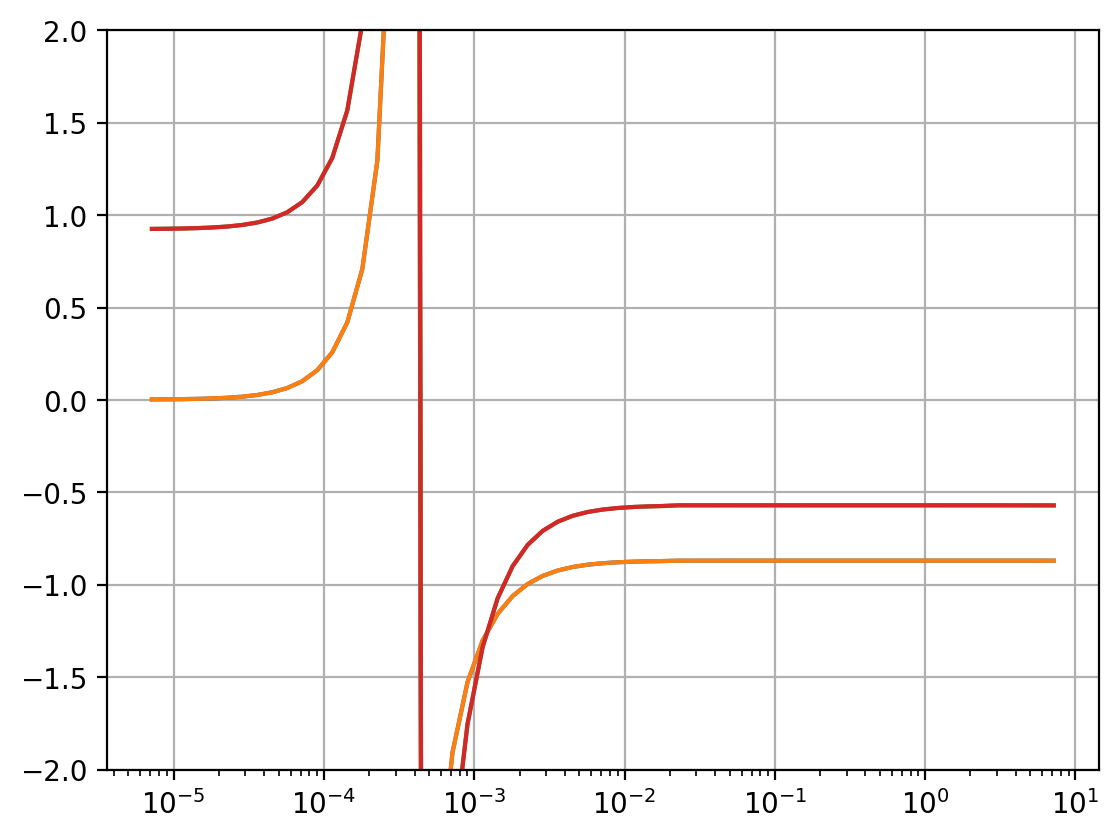

In [100]:
plt.semilogx(k_tks, d_p_fld/d_rho_fld)
plt.semilogx(k_tks2, d_p_fld2/d_rho_fld2)
plt.semilogx(k_tks, d_p_CLASS_recons_z0/d_rho_fld)
plt.semilogx(k_tks, d_p_CLASS_recons2_z0/d_rho_fld)

plt.grid()
plt.ylim(-2, 2)

(-2.0, 2.0)

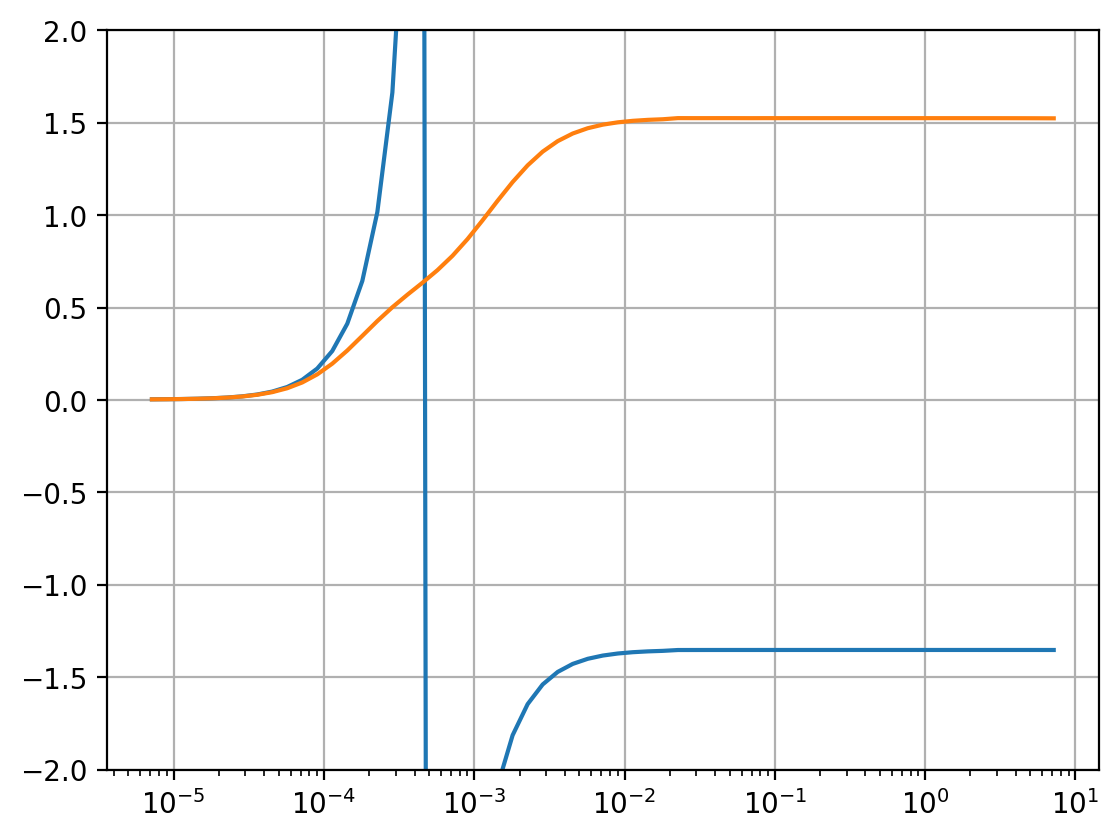

In [101]:
plt.semilogx(k_tks, (d_p_fld/d_rho_fld) / (d_p_recons_z0/d_rho_fld))
plt.semilogx(k_tks, (d_p_fld/d_rho_fld) / (d_p_CLASS_recons_z0/d_rho_fld))

plt.grid()
plt.ylim(-2, 2)

In [141]:
wfld = cosmo_cs2_2.get_background()['(.)w_fld']


In [149]:
2.*np.max(np.abs(wfld))

1.8

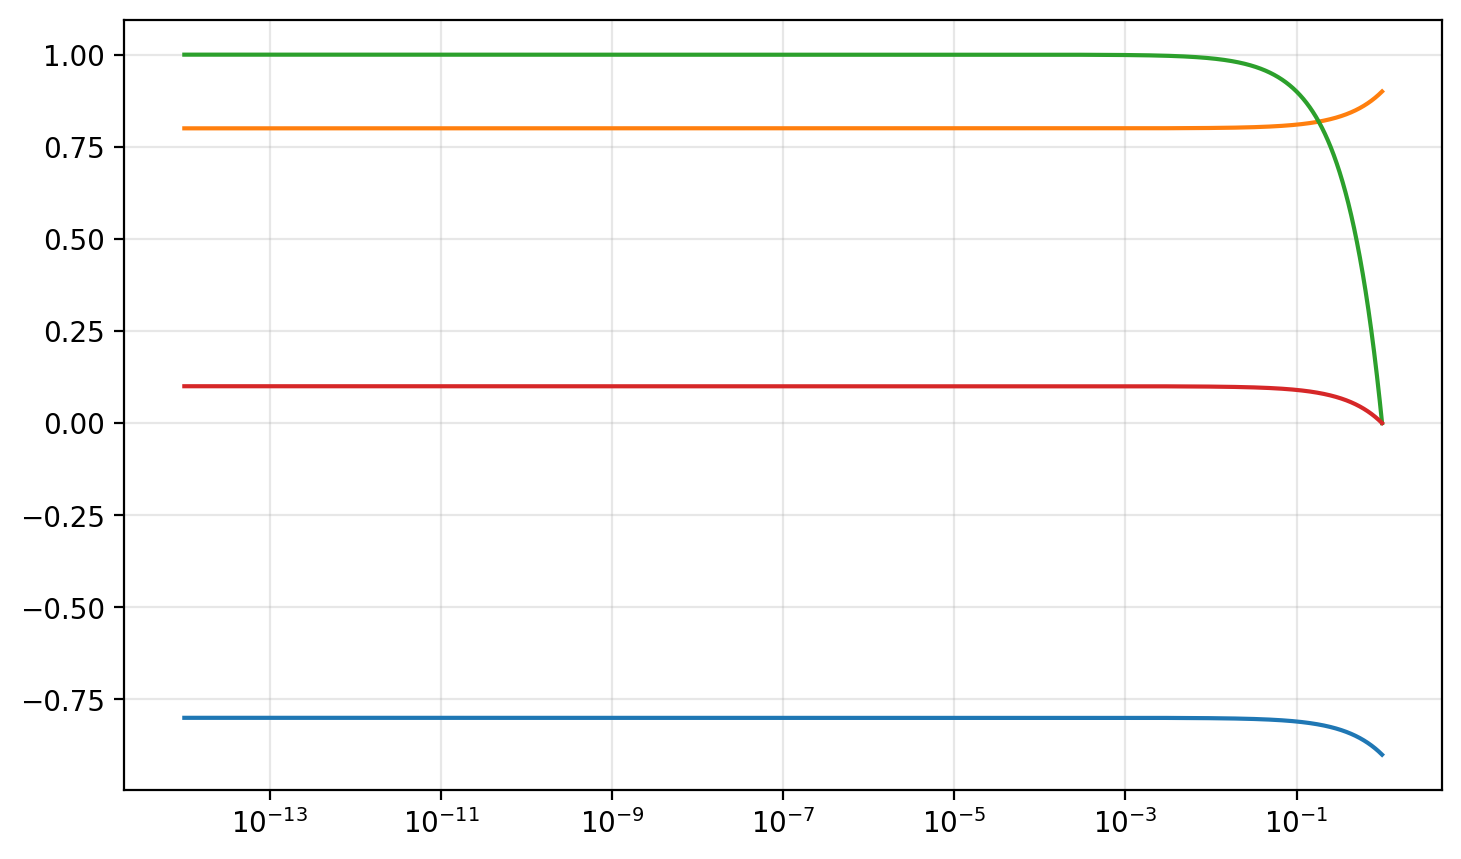

In [150]:
plt.figure(figsize=(8.5, 5))

plt.semilogx(a, wfld)
plt.semilogx(a, np.abs(wfld))
plt.semilogx(a, (wfld - np.min(wfld))/(np.max(wfld) - np.min(wfld)))
plt.semilogx(a, wfld + np.max(np.abs(wfld)))
plt.semilogx(a, - np.log10())

#plt.semilogx(a, cosmo_cs2_2.get_background()['cs2_fld'])
#zi = (xi – min(x)) / (max(x) – min(x))
plt.grid(alpha=0.3)

In [17]:
kk = np.logspace(-4,np.log10(10), 400) # k in h/Mpc
Pk_ref = [] # P(k) in (Mpc/h)**3
Pk_cs2 = [] # P(k) in (Mpc/h)**3
Pk_cs2_w = [] # P(k) in (Mpc/h)**3

h = cosmo_ref.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_ref.append(cosmo_ref.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pk_cs2.append(cosmo_cs2.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pk_cs2_w.append(cosmo_cs2_w.pk(k*h,0.)*h**3) # function .pk(k,z)


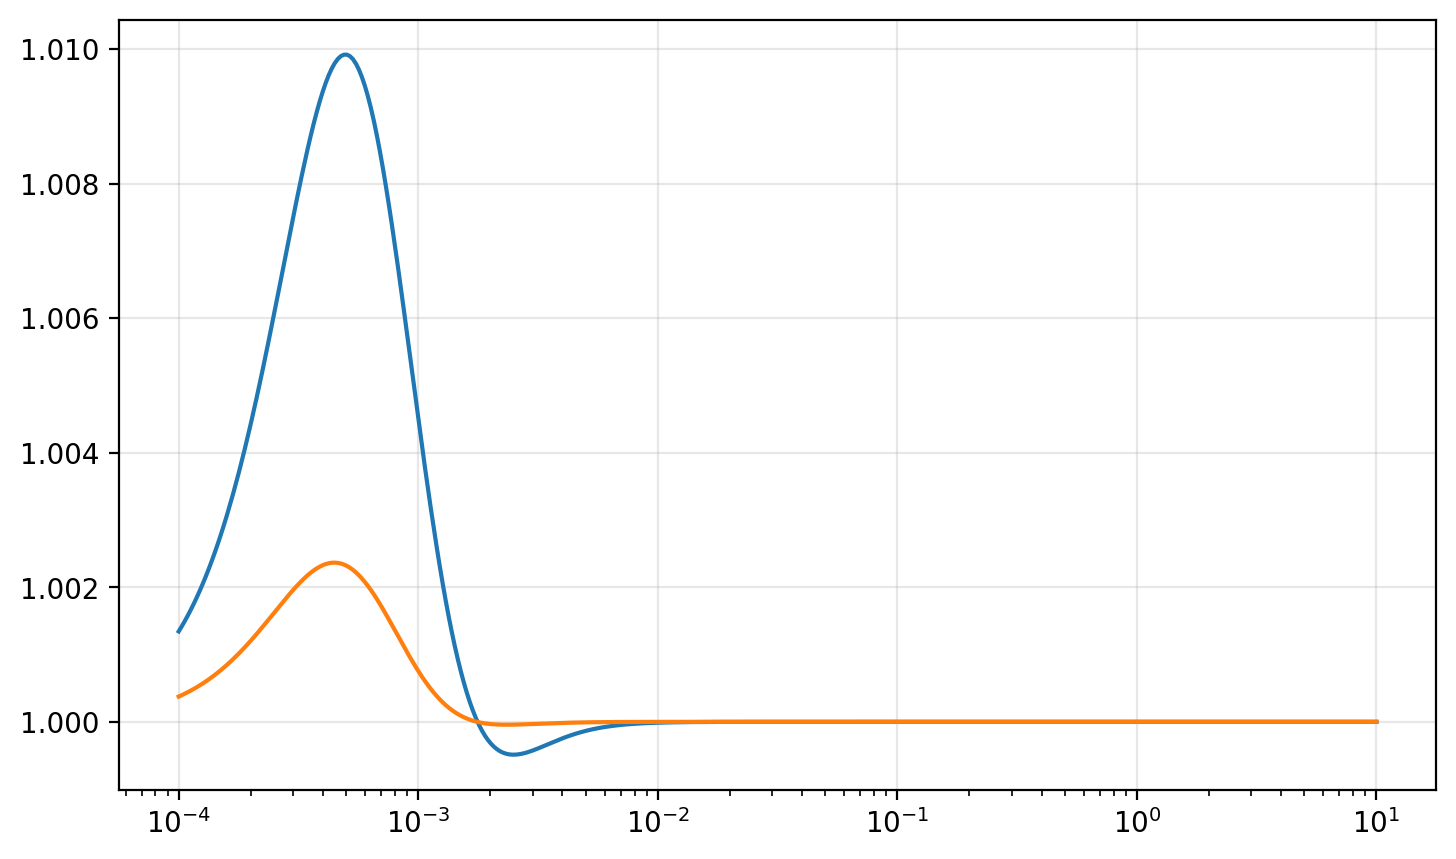

In [18]:
plt.figure(figsize=(8.5, 5))

plt.semilogx(kk, np.array(Pk_cs2)/np.array(Pk_ref))
plt.semilogx(kk, np.array(Pk_cs2_w)/np.array(Pk_ref))
plt.grid(alpha=0.3)

In [105]:
cosmo_ref.get_transfer(0.).keys()

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_fld', 'd_p_fld', 'd_rho_fld', 'd_ur', 'd_m', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_fld', 't_ur', 't_tot'])

In [106]:
k_tks = cosmo_cs2.get_transfer(0.)['k (h/Mpc)'] * cosmo_cs2.h()
d_fld = cosmo_cs2.get_transfer(0.)['d_fld']
t_fld = cosmo_cs2.get_transfer(0.)['t_fld']
t_tot = cosmo_cs2.get_transfer(0.)['t_tot']
d_rho_fld = cosmo_cs2.get_transfer(0.)['d_rho_fld']
d_p_fld = cosmo_cs2.get_transfer(0.)['d_p_fld']

k_tks2 = cosmo_cs2_w.get_transfer(0.)['k (h/Mpc)'] * cosmo_cs2_w.h()
d_fld2 = cosmo_cs2_w.get_transfer(0.)['d_fld']
t_fld2 = cosmo_cs2_w.get_transfer(0.)['t_fld']
t_tot2 = cosmo_cs2_w.get_transfer(0.)['t_tot']
d_rho_fld2 = cosmo_cs2_w.get_transfer(0.)['d_rho_fld']
d_p_fld2 = cosmo_cs2_w.get_transfer(0.)['d_p_fld']

(-2.0, 2.0)

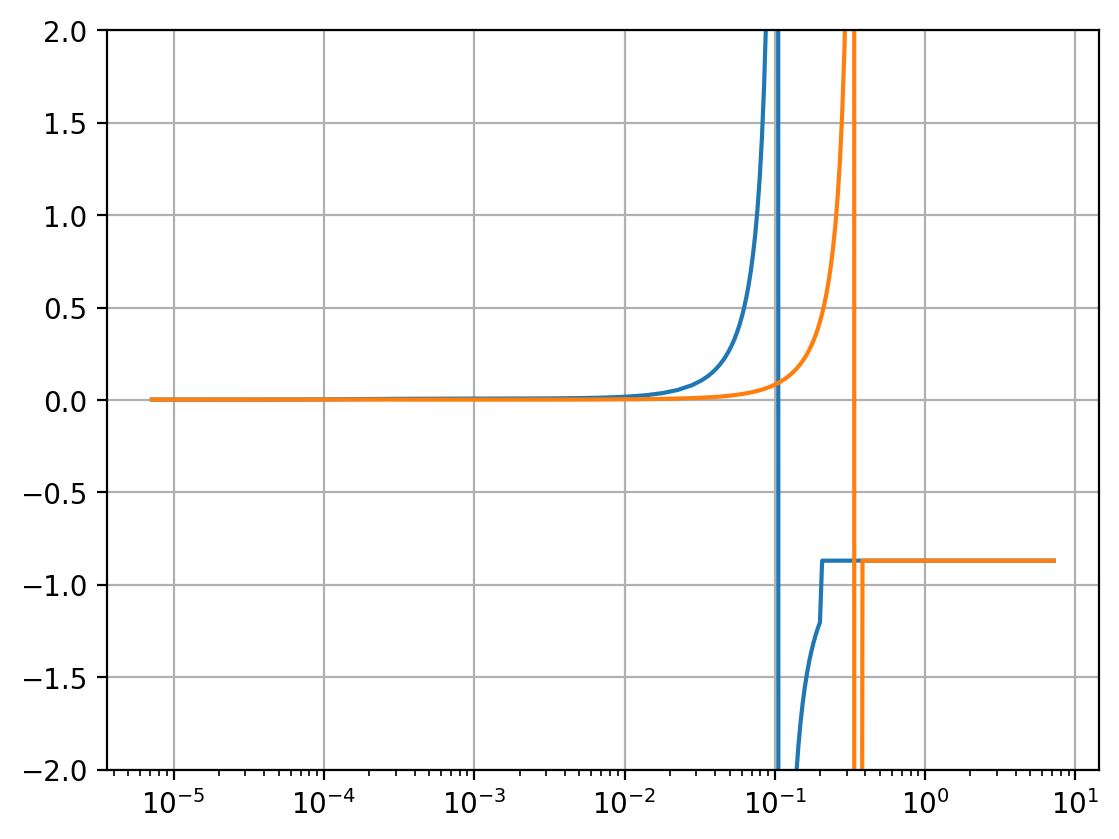

In [107]:
plt.semilogx(k_tks, d_p_fld/d_rho_fld)
plt.semilogx(k_tks2, d_p_fld2/d_rho_fld2)

plt.grid()
plt.ylim(-2, 2)

In [126]:
cosmo_ref.raw_cl(2000)

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.53287138e-10, ...,
        4.90840443e-17, 4.90620172e-17, 4.90383593e-17]),
 'ell': array([   0,    1,    2, ..., 1998, 1999, 2000])}

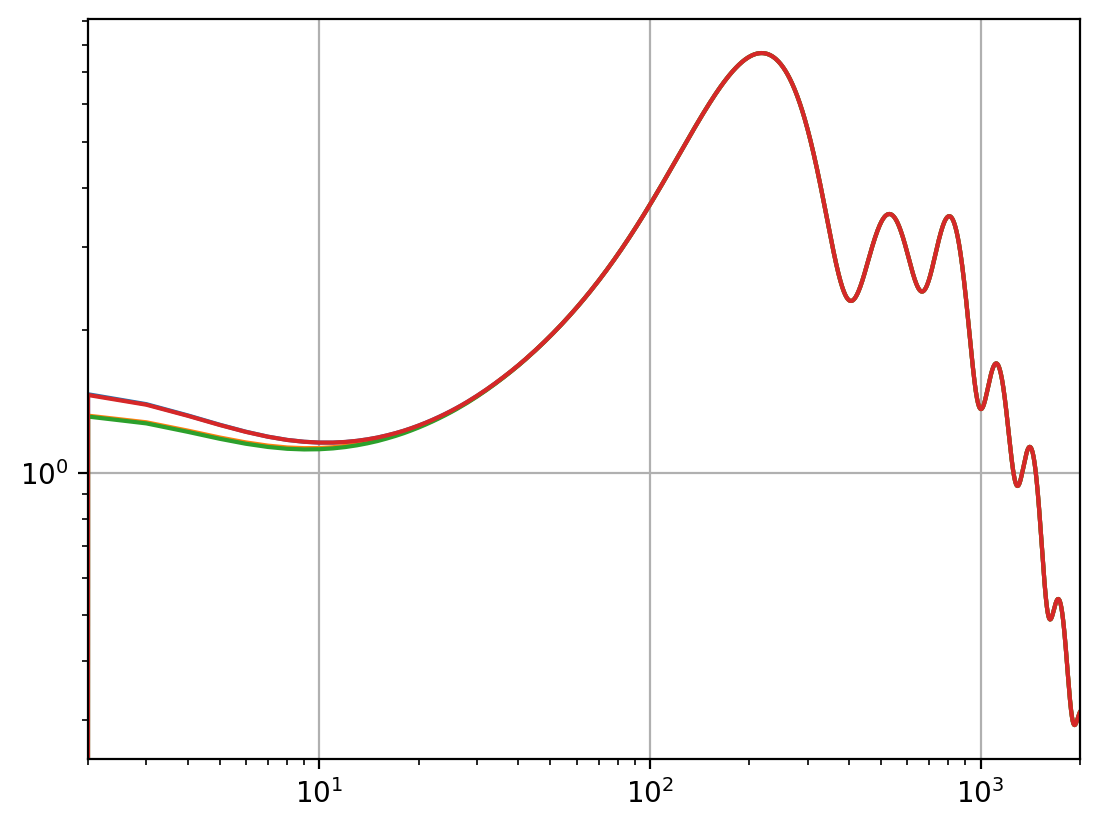

In [135]:
ell= cosmo_ref.raw_cl(2000)['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi
plt.loglog(ell, factor*cosmo_ref.raw_cl(2000)['tt'])
plt.loglog(ell, factor*cosmo_cs2.raw_cl(2000)['tt'])
plt.loglog(ell, factor*cosmo_cs2_w.raw_cl(2000)['tt'])
plt.loglog(ell, factor*cosmo_cs2_2.raw_cl(2000)['tt'])

plt.xlim(2, 2000)
plt.grid()

/tmp/ipykernel_1396020/779074398.py:1: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(ell, cosmo_cs2.raw_cl(2000)['tt'] / cosmo_ref.raw_cl(2000)['tt'])
/tmp/ipykernel_1396020/779074398.py:2: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(ell, cosmo_cs2_w.raw_cl(2000)['tt'] / cosmo_ref.raw_cl(2000)['tt'])
/tmp/ipykernel_1396020/779074398.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(ell, cosmo_cs2_2.raw_cl(2000)['tt'] / cosmo_ref.raw_cl(2000)['tt'])


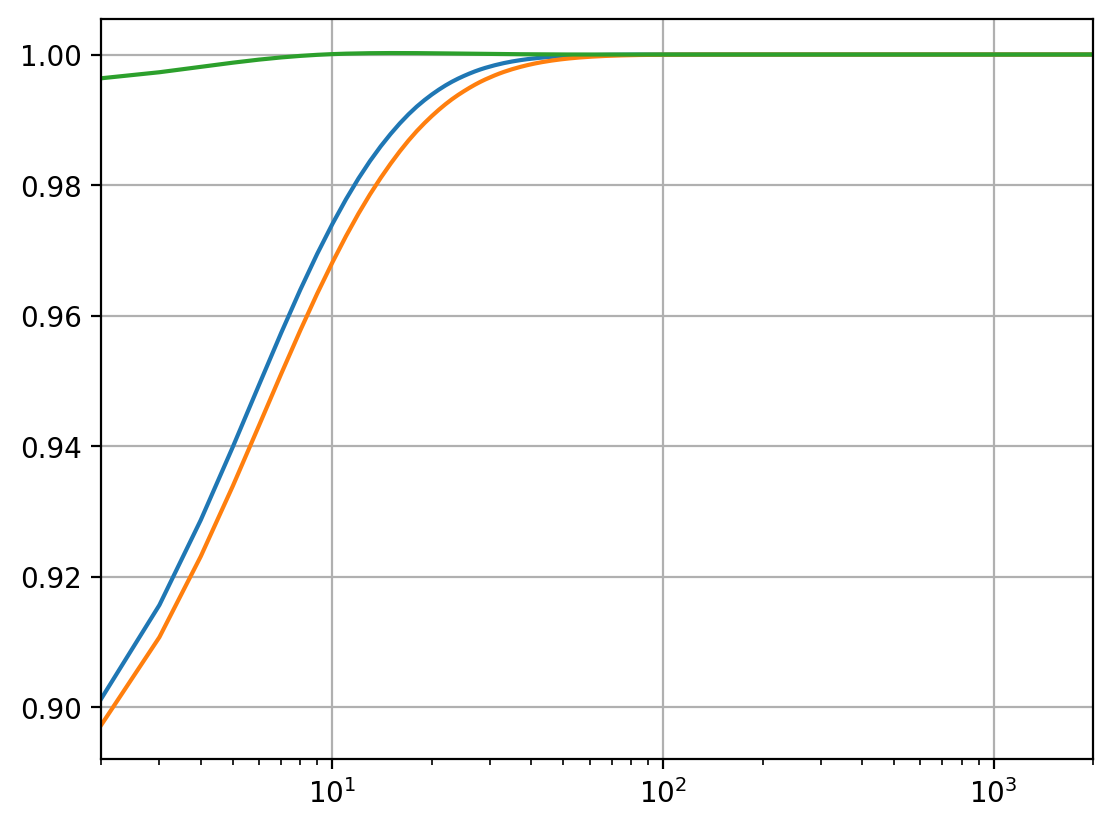

In [136]:
plt.semilogx(ell, cosmo_cs2.raw_cl(2000)['tt'] / cosmo_ref.raw_cl(2000)['tt'])
plt.semilogx(ell, cosmo_cs2_w.raw_cl(2000)['tt'] / cosmo_ref.raw_cl(2000)['tt'])
plt.semilogx(ell, cosmo_cs2_2.raw_cl(2000)['tt'] / cosmo_ref.raw_cl(2000)['tt'])

plt.xlim(2, 2000)
plt.grid()